In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the production possibility frontier :

\begin{align*}
c &= z k_0^{\alpha} (1-l)^{1-\alpha} - g \
\end{align*}

where $\alpha = 0.7$, $k_0 = 1$, $z = 1$, $g>0$ and $c$ is the quantity of goods produced while $l$ is the quantity of labor used in production.

In [2]:
# parameters
z=1.  #TFP productivity
k0=1.  # Exogenous capital stock
α=0.7 #Share o f capital in Cobb-Douglas
g=0.01 #Government spending, it must be > 0 !




In [3]:
def f(l):
    return z*(k0**(α))*((1-l)**(1-α))-g

$(a)$ Plot the production possibility frontier in the space $[l, c]$







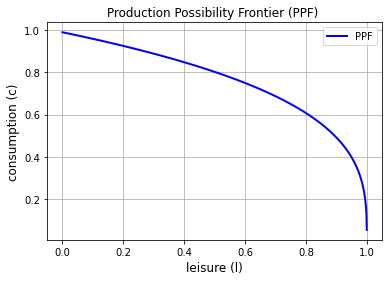

In [4]:
grid_max=0.9999 # max value of grid
grid_size=1000 # size of the grid
grid_min = 0.0000000001
grid= np.linspace(grid_min, grid_max, grid_size) 

fig, ax= plt.subplots()
ax.plot(grid,f(grid),'b',markersize=3, linewidth=2, label='PPF')  
ax.set_xlabel('leisure (l)', fontsize=12)
ax.set_ylabel('consumption (c)', fontsize=12)
ax.set_title('Production Possibility Frontier (PPF) ', fontsize=12)
ax.grid(True)
ax.legend()

$(b)$ Perform a first-order Taylor approximation of the PPF around the point $[l_0=0.5, c(l_0)=0.5]$ and plot it in the space $[l, c]$.

In [5]:
cl_0 = 0.5
l_0 = 0.5

def f_deriv(cl_0): 
    return ((α-1)*(k0**α)*z)/((1-cl_0)**α)

def first_taylor_f(l,l_0):
    for i in l:
        return f(l_0) + f_deriv(l_0) * (l-l_0)

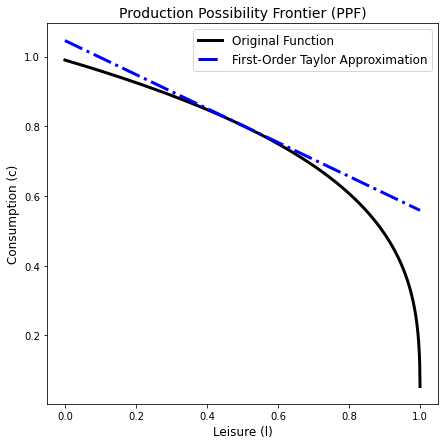

In [6]:
# create a new figure and axes with a specific size
fig, axes = plt.subplots(figsize=(7, 7))

# set the title and axis labels of the plot
axes.set_title('Production Possibility Frontier (PPF)', fontsize=14)
axes.set_ylabel('Consumption (c)', fontsize=12)
axes.set_xlabel('Leisure (l)', fontsize=12)

# plot the original function f(l) as a solid line with a label
axes.plot(grid, f(grid), "k", linewidth=3, label="Original Function")

# plot the first-order Taylor approximation of f(l) around l_0 as a dashed line with a label
axes.plot(grid, first_taylor_f(grid, l_0), "b-.", linewidth=3, label="First-Order Taylor Approximation")


axes.legend(fontsize=12)


$(c)$ Perform a second order Taylor approximation of the PPF around the point $[l_0 = 0.5, c(l_0) = 0.5]$ and plot it in the space $[l, c]$.


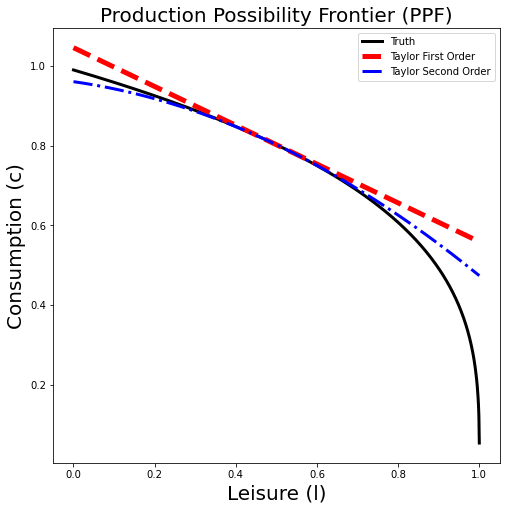

In [7]:
# define a function to compute the second derivative of f(cl_0)
def second_derivative(cl_0): 
    return (α - 1) * α * (k0 ** α) * z * (1 - cl_0) ** (-α - 1)

# define a function to compute the second-order Taylor approximation of f(l) around l_0
def second_taylor_f(grid, l_0):
    return first_taylor_f(grid, l_0) + 0.5 * second_derivative(cl_0) * (grid - l_0) ** 2


fig, axes = plt.subplots(figsize=(8, 8))


axes.set_title('Production Possibility Frontier (PPF)', fontsize=20)
axes.set_ylabel('Consumption (c)', fontsize=20)
axes.set_xlabel('Leisure (l)', fontsize=20)

# plot the original function f(l)
axes.plot(grid, f(grid), "k", linewidth=3, label='Truth')

# plot the first-order Taylor approximation of f(l) around l_0
axes.plot(grid, first_taylor_f(grid, l_0), "r--", linewidth=5, label='Taylor First Order')

# plot the second-order Taylor approximation of f(l) around l_0
axes.plot(grid, second_taylor_f(grid, l_0), "b-.", linewidth=3, label='Taylor Second Order')


axes.legend(fontsize=10)


$(d)$ Generate a sequence of point/nodes of $ls = {\{0.01, ......., 1}\}$. Obtain the production possibility frontier on these points.

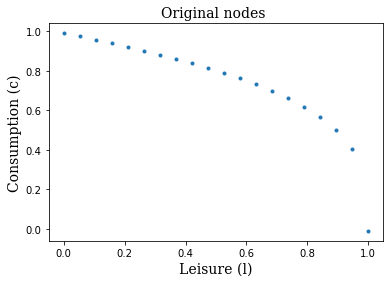

In [8]:
font = {'family': 'serif', 'color':  'black', 'weight': 'light', 'size': 10}

nodes = np.linspace(0,1,20)


yy=f(nodes)

fig , ax = plt.subplots()


ax.set_ylabel('Consumption (c)', fontdict=font, fontsize=14)
ax.set_xlabel('Leisure (l)', fontdict=font, fontsize=14)

ax.set_title('Original nodes ', fontdict=font, fontsize=14)
ax.plot(nodes,yy,".")

(e) Perform a linear interpolation around the sequence $ls$

In [9]:
yy=f(nodes)
f_interpolation = lambda x: np.interp(nodes, nodes, yy)

Text(0.5, 0, 'Leisure (l)')

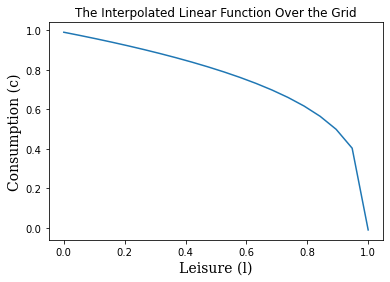

In [10]:
fig, ax= plt.subplots()
ax.plot(nodes,f_interpolation(nodes)) #points
ax.set_title('The Interpolated Linear Function Over the Grid', fontsize=12)
ax.set_ylabel('Consumption (c)', fontdict=font, fontsize=14)
ax.set_xlabel('Leisure (l)', fontdict=font, fontsize=14)

$f)$ Generate a cubic spline around the sequence $ls$ and plot both the cubic and the linear interpolation. Try to use both commands \
$\texttt{CubicSpline}$ \
and \
$\texttt{tck} = \texttt{interpolate.splrep(x, y, k = 3)};$ \
$\texttt{interpolate.splev(xnew, tck)}$

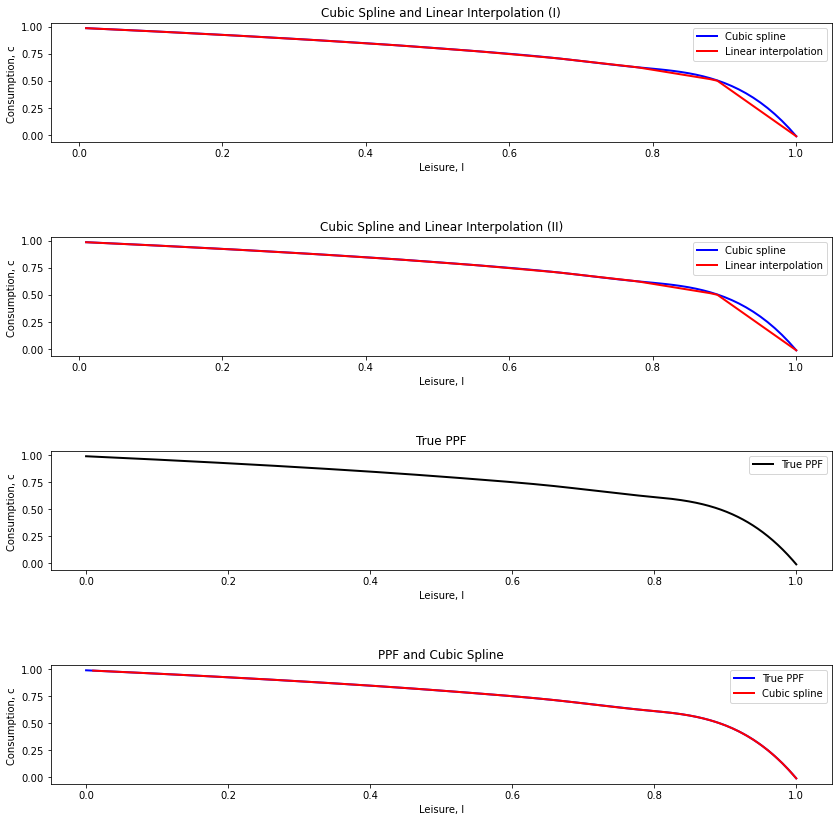

In [11]:
from scipy.interpolate import CubicSpline
from scipy import interpolate

# Define a linearly spaced set of nodes
lin_space = np.linspace(0.0, 1, 10)

# Define a function that returns the function evaluated at the given nodes
def nodes_set(lin_space):
    return f(lin_space)

# Define the nodes and function values
x = lin_space
y = nodes_set(lin_space)

# Perform a cubic spline interpolation using the nodes and function values
f = CubicSpline(x, y)
x_new = np.linspace(0.01, 1, 100)
y_new = nodes_set(x_new)

# Create a figure with two subplots
fig, ax = plt.subplots(4, 1,figsize=(14,14))

# Perform a cubic spline interpolation and linear interpolation and plot them in the first subplot[0]
tck = interpolate.splrep(lin_space, f(lin_space), k=3)
lin_tck = interpolate.splrep(lin_space, f(lin_space), k=1)
f_cspl_new = interpolate.splev(x_new, tck)
f_linspl = interpolate.splev(x_new, lin_tck)
ax[0].plot(x_new, y_new, 'b', linewidth=2, label="Cubic spline")
ax[0].plot(x_new, f_linspl, 'r', linewidth=2, label="Linear interpolation")
ax[0].set_title("Cubic Spline and Linear Interpolation (I)")
ax[0].set_ylabel('Consumption, c ')
ax[0].set_xlabel('Leisure, l')
ax[0].legend()


# Perform a cubic spline interpolation and linear interpolation and plot them in the second subplot[1]
ax[1].plot(x_new, f_cspl_new, "b", linewidth=2, label="Cubic spline")
ax[1].plot(x_new, f_linspl, 'r', linewidth=2, label="Linear interpolation")
ax[1].set_title("Cubic Spline and Linear Interpolation (II)")
ax[1].set_ylabel('Consumption, c ')
ax[1].set_xlabel('Leisure, l')
ax[1].legend()


# plot the original function f(l)
ax[2].plot(grid, f(grid), "k", linewidth=2, label='True PPF')
ax[2].set_title("True PPF")
ax[2].set_ylabel('Consumption, c ')
ax[2].set_xlabel('Leisure, l')
ax[2].legend()

#compare the original function with the cubic spline

ax[3].plot(grid, f(grid), "b", linewidth=2, label="True PPF")
ax[3].plot(x_new, f_cspl_new, 'r', linewidth=2, label="Cubic spline")
ax[3].set_title("PPF and Cubic Spline")
ax[3].set_ylabel('Consumption, c ')
ax[3].set_xlabel('Leisure, l')
ax[3].legend()

plt.subplots_adjust(hspace=0.8)

plt.show()




$(e)$ Comments of your results. Does the polynomial approximation converges to the
Production Possibility Frontier?

From what we can see by observing the charts above, it is clear that the cubic spline provides a better approximation than the linear interpolation. In fact, the cubic interpolation is able to perfectly fit the true Production Possibility Frontier. However, it is important to note that increasing the order of the polynomial approximation does not necessarily lead to a better fit. In fact, as it is easy to show, beyond a certain order, the fit will start to deteriorate.

$2$. Polynomial Approximation of the Production Possibility Frontier.

$c_{[N]}(l; a) = \sum\limits_{n=0}^{N}a_nl^n$


(a) Consider first a second order approximation

$1.$ Generate an evenly linear space in $[0,1]$ of the same size as the order of approximation $j$.

In [12]:
j=2
ls_grid=np.linspace(0,1,j+1) # include in the linspace dim the constant

$2$. Obtain the values at $c_{[N]}(l; a)$ in correspondence to the linear space.

In [13]:
c_n=f(ls_grid)

$3.$ Generate the matrix $X$ , $j + 1 × j + 1$ of the polynomials


In [14]:
xout=np.ones((j+1,j+1)) # polynomial matrix basis to fit 
xout[:,1]=ls_grid**(1)
xout[:,2]=ls_grid**(2)

xout=np.asmatrix(xout)
c_n=np.asmatrix(c_n)

$4.$ Obtain the $j+1$ coefficients by perfect fitting over the linear space.

In [15]:
beta=np.linalg.inv(xout)*np.transpose(c_n)

$5.$ Generate a grid of $200$ points in the interval $[0, 1]$ and fit the polynomial of
order $j$


In [16]:
x=np.linspace(0,1,200)
Xout=np.ones((200,j+1))
Xout[:,1]=x**(1)
Xout[:,2]=x**(2)
Xout=np.asmatrix(Xout)
beta=np.asmatrix(beta)
cn_fit=Xout*beta

$6.$ Plot the polynomials over the entire set of the domain

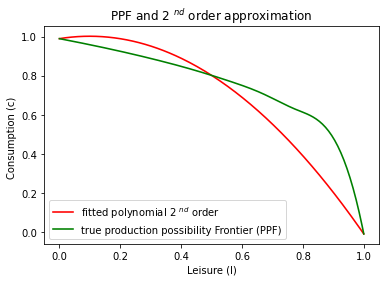

In [17]:
fig, ax= plt.subplots()
ax.set_title("PPF and %s $^{nd}$ order approximation" %j,)
ax.plot(x,cn_fit,linewidth=1.6,color="r", label="fitted polynomial %s $^{nd}$ order" %j)
ax.plot(x,f(x),linewidth=1.6,color ="g",label="true production possibility Frontier (PPF)")
ax.set_ylabel('Consumption (c) ')
ax.set_xlabel('Leisure (l)')
ax.legend()

$(b)$ Repeat the procedure of question a for a polynomial of order $3$

In [18]:
def polynomial_order(j):
    
    # Creating a linearly spaced grid of size j+1 between 0 and 1
    ls_grid=np.linspace(0,1,j+1) 

    # Evaluating the production possibility frontier at the grid points
    c_n=f(ls_grid)
    
    # Creating a matrix of size (j+1, j+1) where each column is the ls_grid raised to the power of (kk-1)
    xout=np.ones((j+1,j+1))
    kk=2
    while kk < j+2:
        xout[:,kk-1]=ls_grid**(kk-1)  
        kk=kk+1
    
    xout=np.asmatrix(xout)
    c_n=np.asmatrix(c_n)
    
    # Calculating the coefficients of the polynomial approximation using the normal equation
    beta=np.linalg.inv(xout)*np.transpose(c_n) 
    
    x=np.linspace(0,1,200)
    
    
    Xout=np.ones((200,j+1))
    
    Kk=2
    while Kk < j+2:
        Xout[:,Kk-1]=x**(Kk-1)  
        Kk=Kk+1
    
    # Converting the numpy arrays to matrices
    Xout=np.asmatrix(Xout)
    beta=np.asmatrix(beta)
    
    # Evaluating the fitted values using the polynomial approximation
    y_fit=Xout*beta
    
    # Plotting the fitted polynomial and the true production possibility frontier
    fig, ax= plt.subplots(figsize=(5,5))
    if j ==1:
        ax.set_title("PPF and %s $^{st}$ order approximation" %j,)
        ax.plot(x,y_fit,linewidth=1.6,color="r", label="fitted polynomial %s $^{st}$ order" %j)
    elif j==2:
        ax.set_title("PPF and %s $^{nd}$ order approximation" %j,)
        ax.plot(x,y_fit,linewidth=1.6,color="r", label="fitted polynomial %s $^{nd}$ order" %j)
    elif j==3:
        ax.set_title("PPF and %s $^{rd}$ order approximation" %j,)
        ax.plot(x,y_fit,linewidth=1.6,color="r", label="fitted polynomial %s $^{rd}$ order" %j)
    else:
        ax.set_title("PPF and %s $^{th}$ order approximation" %j,)
        ax.plot(x,y_fit,linewidth=1.6,color="r", label="fitted polynomial %s $^{th}$ order" %j)      
        
    ax.plot(x,f(x),linewidth=1.6,color ="g",label="true production possibility Frontier (PPF)")
    ax.set_ylabel('Consumption (c) ')
    ax.set_xlabel('Leisure (l)')
    ax.legend()
    
    # Displaying the plot
    return plt.show()


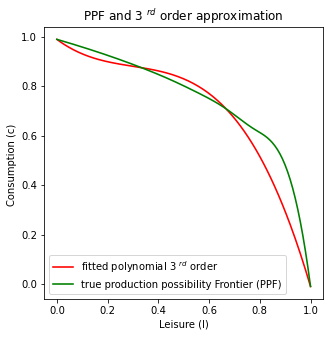

In [19]:
polynomial_order(3)

$(c)$ Repeat the procedure of question a for a polynomial of order $5$

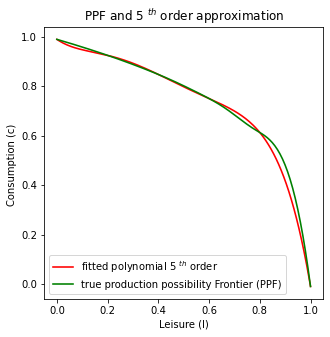

In [20]:
polynomial_order(5)

$(d)$ Repeat the procedure of question a for a polynomial of order $10$


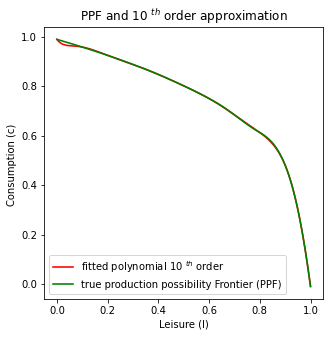

In [21]:
polynomial_order(10)

$(e)$ Comments of your results. Does the polynomial approximation converges to the
Production Posibility Frontier?

The charts above demonstrate that increasing the order of the polynomial leads to a significant improvement in the fitted model's approximation. At the third order, the model is unsatisfactory, but at the tenth order, our polynomial approximation is nearly perfect and converges to the production possibility frontier.


$3.$ Chebyshev Approximation of the Production Possiblity Frontier

Consider now the Chebyshev Polynomial :

$P_{(l; N)} = \sum\limits_{n=1}^{N}a_n T_{(c; n)}$

$(a)$ Generate a sequence of $ls$ in $[0,1]$, and transform this sequence into the Chebyshev
basis $[−1, 1]$ in using the transformation

$zls = a + bls$


In [22]:
lin_s = np.linspace(0.00,1.0,200)

zls=-1+((1+1)/(1-0))*(lin_s-0) #we have normalized in order to obtain the Chebyshev basis between [-1,1]
print(lin_s)
print(" ")
print(" ")
print(zls)

[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.42713568 0.4321608  0.43718593 0.44221106 0.447236

$(b)$ Plot the production possibility frontier on the new zls $∈ \ [−1, 1]$


Text(0.5, 1.0, 'Production possibility frontier (PPF) ')

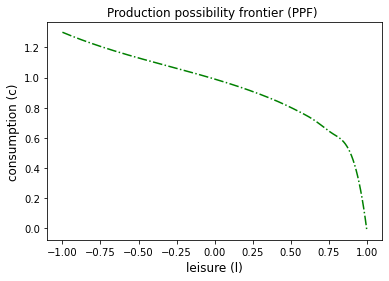

In [23]:
fig, ax= plt.subplots()
ax.plot(zls,f(zls), "g-.")  
ax.set_xlabel('leisure (l)', fontsize=12)
ax.set_ylabel('consumption (c)', fontsize=12)
g=0.23
def f(l):
    return z*(k0**(α))*((1-l)**(1-α))-g
ax.set_title('Production possibility frontier (PPF) ', fontsize=12)

$(c)$ Perform a Chebyshev approximation of order $j=3$


In [24]:
j=3

$1.$ Create a set of Chebyshev nodes  
$x_j = \cos\left(\frac{2j-1}{2J}\pi\right)$ \
and plot the function over the Chebyshev nodes


Text(0.5, 0, 'Leisure (l)')

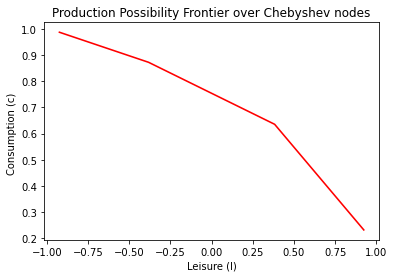

In [25]:
grid=np.zeros(j+1) #a grid for the Chebyshev nodes
kk=0
while kk<j+1:
    grid[kk]=np.cos(np.pi*(kk+1-0.5)/(j+1))
    kk=kk+1


f_funct=f(grid)
fig, ax= plt.subplots()
ax.plot(grid,f_funct,"r-",linewidth=1.6)
ax.set_title('Production Possibility Frontier over Chebyshev nodes')
ax.set_ylabel('Consumption (c) ',fontsize=10)
ax.set_xlabel('Leisure (l)',fontsize=10)

$2.$ Fill in the matrix of Chebyshev basis $X (j + 1 × j + 1)$ and obtain the
Chebyshev coefficients by perfect OLS fitting


In [26]:
x_mat=np.ones((j+1,j+1)) 
x_mat[:,1]=grid

kk=2

while kk < j+1:
    x_mat[:,kk]=2*grid*x_mat[:,kk-1]-x_mat[:,kk-2]
    kk=kk+1

x_mat=np.asmatrix(x_mat) #from array to matrix to OLS fit
f_funct=np.asmatrix(f_funct)
grid=np.asmatrix(grid)
beta=np.linalg.inv(x_mat)*np.transpose(f_funct)

$3.$ Generate a grid of $200$ points over the interval $[0, 1]$ and fit the polynomial of
order $j$

In [27]:
X_mat=np.ones((200,j+1))
X_mat[:,1]=zls 

kk=2

while kk < j+1:
    X_mat[:,kk]=2*zls*X_mat[:,kk-1]-X_mat[:,kk-2]
    kk=kk+1

X_mat=np.asmatrix(X_mat)
beta=np.asmatrix(beta)
f_fit=X_mat*beta



$4.$ Plot the Chebyshev polynomials over the entire set of the domain $[−1, 1]$


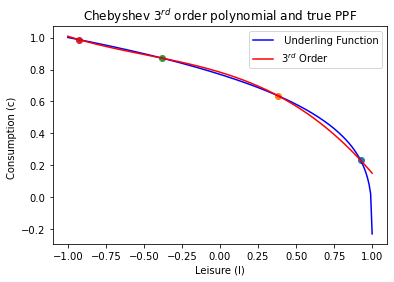

In [28]:
fig, ax=plt.subplots()

ax.set_title("Chebyshev $3^{rd}$ order polynomial and true PPF")
ax.plot(grid,f_funct,'o')

ax.plot(zls,f(zls), label=" Underling Function", color="b")
ax.plot(zls,f_fit, label="$3^{rd}$ Order", color="r")
ax.set_ylabel('Consumption (c) ')
ax.set_xlabel('Leisure (l)')
ax.legend()


$5.$ Repeat the procedure of question $(a)$ for a polynomial of order $5$


In [29]:
#as the previous exercise we define first a function which will be repeated for the following exercises:

def Chebyshev_polynomial(j):
    grid=np.zeros(j+1) #a grid for the Chebyshev nodes
    kk=0
    while kk<j+1:
        grid[kk]=np.cos(np.pi*(kk+1-0.5)/(j+1))
        kk=kk+1
        x_mat=np.ones((j+1,j+1)) 
    x_mat[:,1]=grid

    kk=2

    while kk < j+1:
        x_mat[:,kk]=2*grid*x_mat[:,kk-1]-x_mat[:,kk-2]
        kk=kk+1
    f_funct=f(grid)
    x_mat=np.asmatrix(x_mat) #from array to matrix to OLS fit
    f_funct=np.asmatrix(f_funct)
    grid=np.asmatrix(grid)
    beta=np.linalg.inv(x_mat)*np.transpose(f_funct)
    X_mat=np.ones((200,j+1))
    X_mat[:,1]=zls 

    kk=2

    while kk < j+1:
        X_mat[:,kk]=2*zls*X_mat[:,kk-1]-X_mat[:,kk-2]
        kk=kk+1

    X_mat=np.asmatrix(X_mat)
    beta=np.asmatrix(beta)
    f_fit=X_mat*beta
    fig, ax=plt.subplots(figsize=(5,5))
    
    if j==1:
        ax.set_title("Chebyshev %s $^{st}$ order polynomial and true function" %j)
        ax.plot(zls,f_fit, label="%s $^{st}$ Order" %j)
    elif j==2:
        ax.set_title("Chebyshev %s $^{nd}$ order polynomial and true function" %j)
        ax.plot(zls,f_fit, label="%s $^{nd}$ Order" %j)
    elif j==3:
        ax.set_title("Chebyshev %s $^{rd}$ order polynomial and true function" %j)
        ax.plot(zls,f_fit, label="%s $^{rd}$ Order" %j)
    else:
        ax.set_title("Chebyshev %s $^{th}$ order polynomial and true function" %j)
        ax.plot(zls,f_fit, label="%s $^{th}$ Order" %j)

    ax.plot(grid,f_funct,'o')

    ax.plot(zls,f(zls), label=" Underling Function")
    ax.set_ylabel('Consumption, c ')
    ax.set_xlabel('Leisure, l')
    ax.legend()
    
    return plt.show()

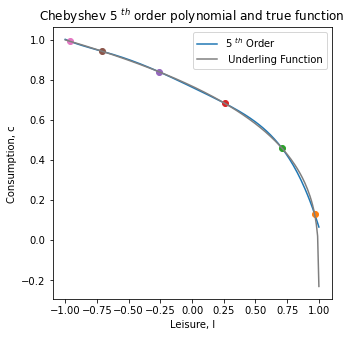

In [30]:
Chebyshev_polynomial(5)

$6.$ Repeat the procedure of question $(a)$ for a polynomial of order $10$


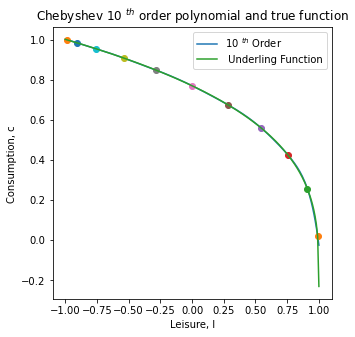

In [31]:
Chebyshev_polynomial(10)

$7.$ Comments of your results. Does the polynomial approximation converges to
the Production Possibility Frontier?


From what we can observe by the charts above, it is straightforward to see that like the first and the second exercises when the order of the polynomial is low the approximation made by our model is not perfect. Instead, when the the order of our approximation increases we can achieve a better results. By approximating our Chebyshev model to the $10^{th}$ order we obtain a perfect fit with the production possibility frontier
